<a href="https://colab.research.google.com/github/aryatomarAI/Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/Deep-Learning-for-Computer-Vision/Deep_Learning_on_custom_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with custom images (Classify between Dog and Cat)  😺 🐕‍🦺

## Data 
The Kaggle Competition: Cats and Dogs includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!




## Load the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# !unzip -u "/content/drive/MyDrive/CATS_DOGS.zip" -d "/content/drive/MyDrive/Data"

In [3]:
import tensorflow as tf
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

## Visualize the data

In [ ]:
cat4=cv2.imread("/content/drive/MyDrive/Data/CATS_DOGS/train/CAT/1001.jpg")

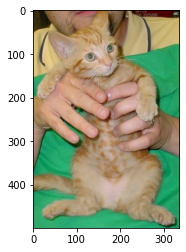

In [ ]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)
plt.imshow(cat4);

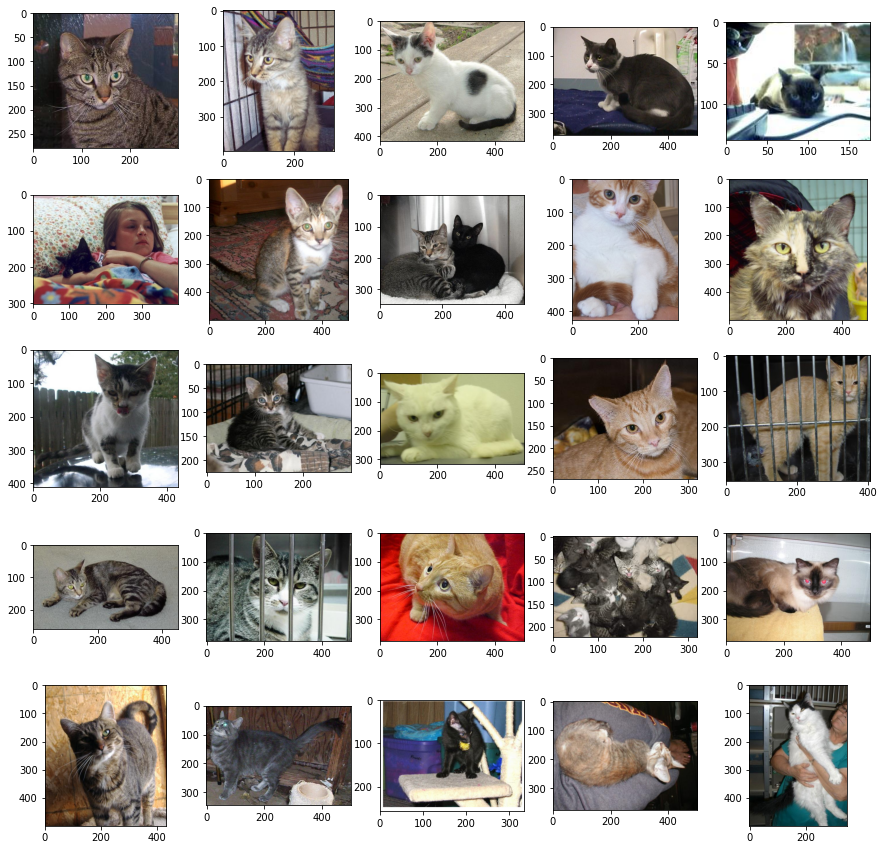

In [6]:
path="drive/MyDrive/Data/CATS_DOGS/train/CAT/"
plt.figure(figsize=(15,15))

for i in range(25):
  ax=plt.subplot(5,5,i+1)
  image=cv2.imread(path + str(i+1) + ".jpg")
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)

In [ ]:
cat4.shape

(500, 336, 3)

In [8]:
import os
len(os.listdir("drive/MyDrive/Data/CATS_DOGS/train/CAT"))   # Number of images in our cat training data set

9371

In [9]:
len(os.listdir("drive/MyDrive/Data/CATS_DOGS/train/DOG"))  # Number of images in our dog training data set

9372

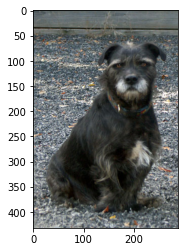

In [ ]:
dog=cv2.imread("drive/MyDrive/Data/CATS_DOGS/train/DOG/28.jpg")

dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

plt.imshow(dog)

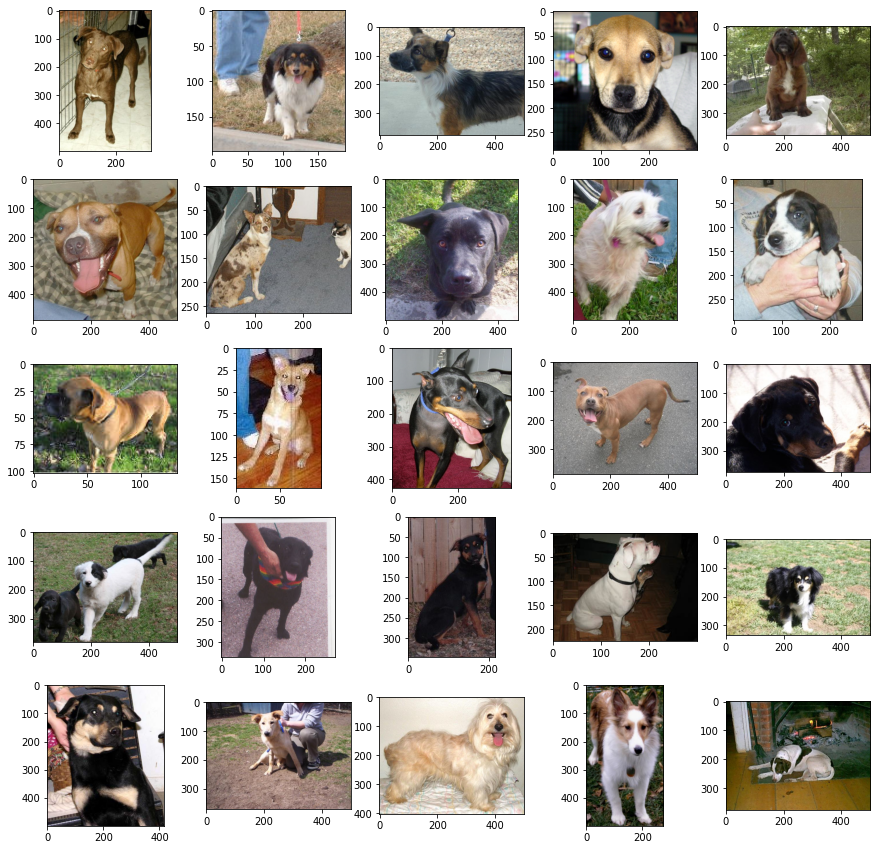

In [10]:
path="drive/MyDrive/Data/CATS_DOGS/train/DOG/"
plt.figure(figsize=(15,15))

for i in range(25):
  ax=plt.subplot(5,5,i+1)
  image=cv2.imread(path + str(i+1) + ".jpg")
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)


In [ ]:
# Let's check number of images in our test data set 
len(os.listdir("/content/drive/MyDrive/Data/CATS_DOGS/test/CAT"))

3126

In [ ]:
len(os.listdir("/content/drive/MyDrive/Data/CATS_DOGS/test/DOG"))

3125

In [ ]:
dog.shape

(432, 288, 3)

In [11]:
# To create more data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

In [12]:
image_gen=ImageDataGenerator(rescale=1/255,rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,preprocessing_function=preprocess_input,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")

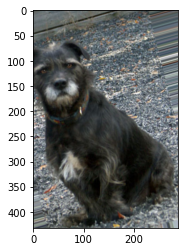

In [ ]:
plt.imshow(image_gen.random_transform(dog))

### Generating many manipulated images from a directory

In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

Image Data Folder

Class 1

0.jpg

1.jpg

...

Class 2

0.jpg

1.jpg

...

In [ ]:
image_gen.flow_from_directory("/content/drive/MyDrive/Data/CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory("/content/drive/MyDrive/Data/CATS_DOGS/test")

Found 6251 images belonging to 2 classes.


### Resizing the images
Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [ ]:
image_shape=(150,150,3)

## Creating the model using keras

In [13]:
model=tf.keras.models.Sequential()

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_initializer="he_uniform",padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu",kernel_initializer="he_uniform"))

model.add(layers.Dropout(0.5))  # Drop 50% images randomly
model.add(layers.Dense(1,activation='sigmoid'))
adam= tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

## Training the model

In [14]:

train_image_gen=image_gen.flow_from_directory("/content/drive/MyDrive/Data/CATS_DOGS/train",
                                              target_size=(150,150),batch_size=64,class_mode='binary',shuffle=True)



Found 18743 images belonging to 2 classes.


In [15]:
test_image_gen=image_gen.flow_from_directory("/content/drive/MyDrive/Data/CATS_DOGS/test",
                                             target_size=(150,150),batch_size=64,class_mode='binary',shuffle=True)

Found 6251 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [16]:
results=model.fit_generator(train_image_gen,epochs=20,steps_per_epoch=150,validation_data=test_image_gen,
                            validation_steps=12,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
150/150 [==============================] - 3291s 22s/step - loss: 0.6749 - accuracy: 0.5768 - val_loss: 0.6436 - val_accuracy: 0.6055
Epoch 2/20
150/150 [==============================] - 1690s 11s/step - loss: 0.6421 - accuracy: 0.6231 - val_loss: 0.6133 - val_accuracy: 0.6628
Epoch 3/20
150/150 [==============================] - 956s 6s/step - loss: 0.6310 - accuracy: 0.6431 - val_loss: 0.6402 - val_accuracy: 0.6250
Epoch 4/20
 77/150 [==============>...............] - ETA: 3:14 - loss: 0.6326 - accuracy: 0.6335

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

150/150 [==============================] - 583s 4s/step - loss: 0.6245 - accuracy: 0.6456 - val_loss: 0.5928 - val_accuracy: 0.6927
Epoch 5/20
150/150 [==============================] - 387s 3s/step - loss: 0.6151 - accuracy: 0.6626 - val_loss: 0.5797 - val_accuracy: 0.6979
Epoch 6/20
150/150 [==============================] - 287s 2s/step - loss: 0.6027 - accuracy: 0.6685 - val_loss: 0.5828 - val_accuracy: 0.7044
Epoch 7/20
150/150 [==============================] - 242s 2s/step - loss: 0.5956 - accuracy: 0.6793 - val_loss: 0.5815 - val_accuracy: 0.6992
Epoch 8/20
150/150 [==============================] - 194s 1s/step - loss: 0.5896 - accuracy: 0.6833 - val_loss: 0.5665 - val_accuracy: 0.6979
Epoch 9/20
150/150 [==============================] - 169s 1s/step - loss: 0.5762 - accuracy: 0.6964 - val_loss: 0.5429 - val_accuracy: 0.7279
Epoch 10/20
150/150 [==============================] - 153s 1s/step - loss: 0.5779 - accuracy: 0.6986 - val_loss: 0.5872 - val_accuracy: 0.6784
Epoch 11/

In [18]:
model.save("/content/drive/MyDrive/Model/my_cat_dog_model.h5")